In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [15]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

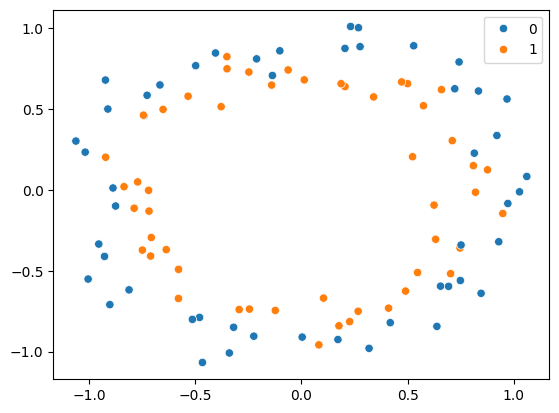

In [16]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
history= model.fit(X_train,y_train,epochs=3500,validation_data=(X_test,y_test),verbose=0)

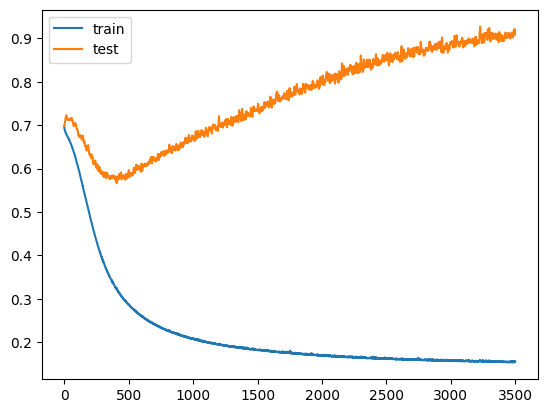

In [25]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

THE NETWORK IS CLEARLY AN OVERIFT AFTER AROUND 400 EPOCHS AS THE `val_loss` IS INCREASING RATHER THAN DECREASING AS IN THE `loss`

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


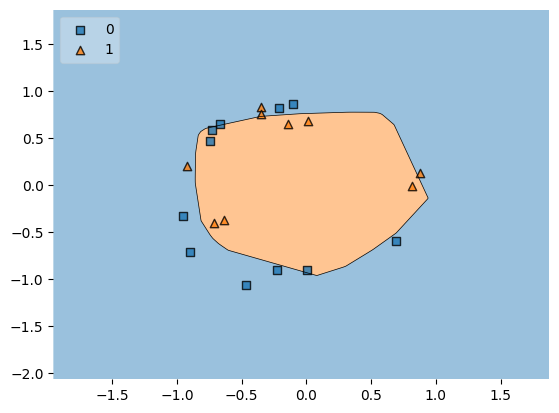

In [26]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

## EARLY STOPPING

In [32]:
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
callback=EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [36]:
history= model.fit(X_train,y_train,epochs=3500,validation_data=(X_test,y_test),callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5805 - loss: 0.6736 - val_accuracy: 0.4000 - val_loss: 0.7174
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5766 - loss: 0.6754 - val_accuracy: 0.4000 - val_loss: 0.7164
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6039 - loss: 0.6699 - val_accuracy: 0.4000 - val_loss: 0.7163
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5336 - loss: 0.6774 - val_accuracy: 0.4000 - val_loss: 0.7157
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5531 - loss: 0.6764 - val_accuracy: 0.4000 - val_loss: 0.7164
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6078 - loss: 0.6662 - val_accuracy: 0.4000 - val_loss: 0.7170
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5375 - loss: 0.6750 - val_accuracy: 0.4000 - val_loss: 0.7166
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5961 - loss: 0.6636 - val_accuracy: 0.4000 - v

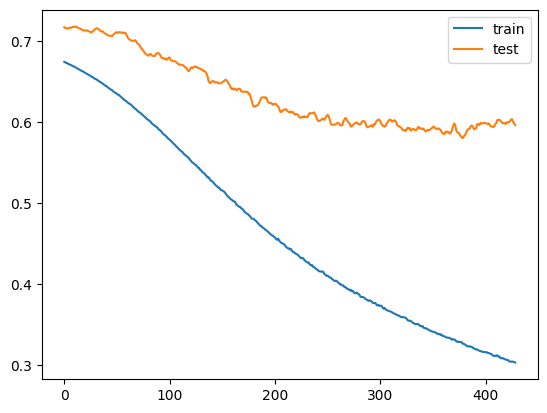

In [37]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

THE `val_loss` IS NOW DECREASING ALONG WITH THE `loss` AND HENCE NOW THE MODEL IS NOT OVERFIT DUE TO EARLY STOPPING AT EPOCH = 429

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


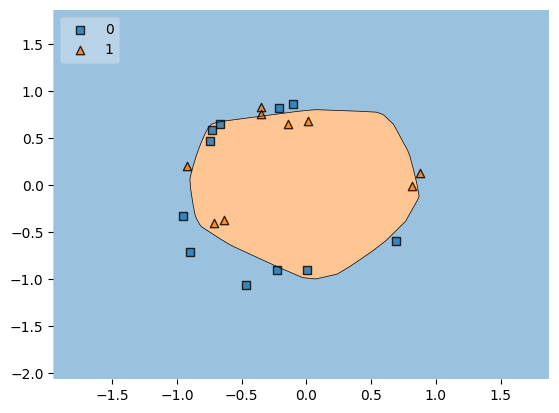

In [43]:
plot_decision_regions(X_test, y_test, clf = model, legend=2)
plt.show()